# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection

In [238]:
mail_data = pd.read_csv('data/spam_or_not_spam.csv')
mail_data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [239]:
data_structure = mail_data.label.value_counts()
data_structure


label
0    2500
1     500
Name: count, dtype: int64

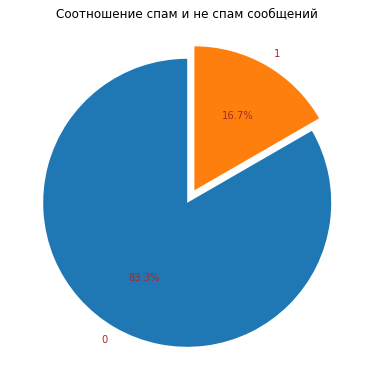

In [240]:
fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(data_structure, 
    labels=data_structure.index,
    autopct='%.1f%%', 
    explode = [0, 0.1],
    textprops=dict(color='brown'),
    startangle=90)
axes.set_title('Соотношение спам и не спам сообщений');

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [241]:
from sklearn.feature_extraction.text import CountVectorizer

In [242]:
data = mail_data.copy()

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [243]:
mask = (data['email'] == ' ') | data['email'].isna()
data.drop(data[mask].index, inplace=True)

Переводим данные в векторный вид:

In [244]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [245]:
X.shape

(2997, 34116)

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [246]:
y = data['label']

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [247]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, 
    stratify=y,
    test_size=0.25, 
    random_state=42
)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [248]:
y_test.mean()

0.16533333333333333

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [249]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn import metrics

In [250]:
clf = MultinomialNB(alpha=0.01)
clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

print(f"Accuracy на тестовом наборе: {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"Precision на тестовом наборе: {metrics.precision_score(y_test, y_test_pred)}")

Accuracy на тестовом наборе: 0.9866666666666667
Precision на тестовом наборе: 1.0


In [251]:
clf = ComplementNB(alpha=0.01)
clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [252]:
print(f"Accuracy на тестовом наборе: {metrics.accuracy_score(y_test, y_test_pred)}")
print(f"Precision на тестовом наборе: {metrics.precision_score(y_test, y_test_pred)}")
print('Recall на тестовом наборе: {:.2f}'.format(metrics.recall_score(y_test, y_test_pred)))
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Accuracy на тестовом наборе: 0.988
Precision на тестовом наборе: 1.0
Recall на тестовом наборе: 0.93
f1_score на тестовом наборе: 0.96


Нарисуйте ROC-кривую:

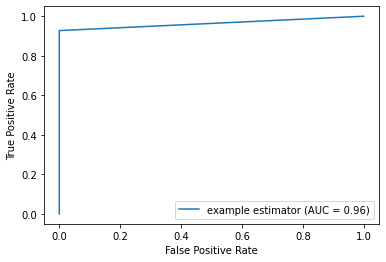

In [253]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [254]:
from sklearn.model_selection import GridSearchCV

In [255]:
clf = ComplementNB()
param_grid = {'alpha': list(np.linspace(0.01, 1, 10))}

grid_search = GridSearchCV(
    estimator=clf, 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)  
grid_search.fit(X_train, y_train) 
y_test_pred = grid_search.predict(X_test)
print("accuracy на тестовом наборе: {:.2f}".format(metrics.accuracy_score(y_test, y_test_pred)))
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшее значение alpha: {}".format(grid_search.best_params_))

accuracy на тестовом наборе: 0.99
f1_score на тестовом наборе: 0.98
Наилучшее значение alpha: {'alpha': 0.34}
